## Loading our dataset

In [279]:
from datasets import load_dataset, concatenate_datasets

In [280]:
qa2d = load_dataset("domenicrosati/QA2D")

In [281]:
checkpoint = "google-t5/t5-small" # Our model of choice will be the google/flan-t5-small

## Exploratory data analysis

In [282]:
import pandas as pd

In [283]:
qa2d # Let's first get an idea of the shape of this dataset

DatasetDict({
    train: Dataset({
        features: ['dataset', 'example_uid', 'question', 'answer', 'turker_answer', 'rule-based'],
        num_rows: 60710
    })
    dev: Dataset({
        features: ['dataset', 'example_uid', 'question', 'answer', 'turker_answer', 'rule-based'],
        num_rows: 10344
    })
})

In [284]:
# Let's concatenate the train and dev datasets together to clean them up
qa2d = concatenate_datasets([qa2d["train"], qa2d["dev"]])

In [285]:
qa2d

Dataset({
    features: ['dataset', 'example_uid', 'question', 'answer', 'turker_answer', 'rule-based'],
    num_rows: 71054
})

In [286]:
# Load the training dataset into a Pandas Dataframe
qa2d_pd = qa2d.to_pandas()

In [287]:
qa2d_pd.head()

,dataset,example_uid,question,answer,turker_answer,rule-based
0,SQuAD,572812523acd2414000df3bf,What was Prince Albert 's nickname ?,Bertie,Prince Albert 's nickname was Bertie .,Prince Albert 's nickname was Bertie .
1,SQuAD,572817584b864d1900164464,Where is the centre of London said to be located ?,Eleanor Cross at Charing Cross near the junction of Trafalgar Square and Whitehall,The centre of London is said to be located by the Eleanor Cross in Charing Cross near the junction of Trafalgar Square and Whitehall .,The centre of London is said to be located in Eleanor Cross at Charing Cross near the junction of Trafalgar Square and Whitehall .
2,SQuAD,57312c6005b4da19006bce36,What pigment was used to paint villas in ancient Rome ?,vermilion,Vermillion pigment was used to paint villas in ancient Rome .,Vermilion was used to paint villas in ancient Rome .
3,SQuAD,57266b70708984140094c56a,Who was the Queen 's first grandchild ?,Wilhelm,Wilhelm was the Queen 's first grandchild .,Wilhelm was the Queen 's first grandchild .
4,SQuAD,56db66a2e7c41114004b509a,Who did BMG partner with in 2005-2007 ?,Sony Music Entertainment,BMG partnered with Sony Music Entertainment in 2005-2007 .,BMG partner with Sony Music Entertainment in 2005-2007 .


In [288]:
qa2d_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71054 entries, 0 to 71053
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dataset        71054 non-null  object
 1   example_uid    71054 non-null  object
 2   question       71054 non-null  object
 3   answer         71053 non-null  object
 4   turker_answer  71054 non-null  object
 5   rule-based     71054 non-null  object
dtypes: object(6)
memory usage: 3.3+ MB


In [289]:
# Let's find any questions which have the same question, answer and turker_answer since we'll be using those features
qa2d_pd[qa2d_pd.duplicated(subset=["answer", "answer", "turker_answer"])]

,dataset,example_uid,question,answer,turker_answer,rule-based
11540,SQuAD,57302f4004bcaa1900d7730a,When did the Norman Conquest occur ?,1066,The Norman Conquest occurred in 1066 .,The Norman Conquest occurred in 1066 .
12594,SQuAD,57309103069b531400832191,What does ATC stand for ?,air traffic control,ATC stands for air traffic control .,ATC stands for air traffic control .
17324,SQuAD,572ff2f6947a6a140053ce5d,Who wrote the Divine Comedy ?,Dante Alighieri,Dante Alighieri wrote the Divine Comedy .,Dante Alighieri wrote the Divine Comedy .
17356,SQuAD,572929766aef051400154b03,When was the first Solvay Conference held ?,1911,The first Solvay Conference was held in 1911 .,The first Solvay Conference was held in 1911 .
17859,SQuAD,5731a5ede17f3d14004222a5,What amoun of the United States population is compromised of Native Americans ?,0.97 % to 2 %,0.97 % to 2 % of the United States population is compromised of Native Americans .,0.97 % to 2 % is compromised of Native Americans .
...,...,...,...,...,...,...
68966,SQuAD,56cf582eaab44d1400b8909d,Chopin 's performances were known for what ?,nuance and sensitivity,Chopin 's performances were known for nuance and sensitivity .,Chopin 's performances were known for nuance and sensitivity .
69736,SQuAD,5705dec952bb891400689639,The Times and its sister paper The Sunday Times are published by what company ?,Times Newspapers,The Times and its sister paper The Sunday Times are published by Times Newspapers .,The Times and its sister paper The Sunday Times are published by Times Newspapers .
69791,SQuAD,57260946ec44d21400f3d81e,When was the Royal Dutch Petroleum Company founded ?,1890,The Royal Dutch Petroleum Company was founded in 1890 .,The Royal Dutch Petroleum Company was founded in 1890 .
69793,SQuAD,56cfde92234ae51400d9bfbb,In 1842 where did Chopin and Sand move ?,Square d'Orléans,Chopin and Sand moved to Square d'Orléans in 1842 .,In 1842 Chopin and Sand move in Square d'Orléans .


In [290]:
# Now remove all the duplicates
qa2d_pd.drop_duplicates(inplace=True, subset=["question", "answer", "turker_answer"])

In [291]:
qa2d_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71015 entries, 0 to 71053
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dataset        71015 non-null  object
 1   example_uid    71015 non-null  object
 2   question       71015 non-null  object
 3   answer         71014 non-null  object
 4   turker_answer  71015 non-null  object
 5   rule-based     71015 non-null  object
dtypes: object(6)
memory usage: 3.8+ MB


In [292]:
pd.set_option('display.max_colwidth', None)
qa2d_pd.iloc[98]

dataset                                                                       SQuAD
example_uid                                                572844763acd2414000df815
question         In what year did Gabe Newell call the PS3 `` a total disaster '' ?
answer                                                                         2007
turker_answer           Gabe Newell called the PS3 `` a total disaster '' in 2007 .
rule-based              Gabe Newell called the PS3 `` a total disaster in 2007 '' .
Name: 98, dtype: object

In [293]:
qa2d_pd.dropna(inplace=True) # Remove all Null values

In [294]:
qa2d_pd.shape

(71014, 6)

### Finding the max_length for the ideal inputs and outputs
Now that we've cleaned our dataset, we must determine the max_length for preprocessing.

In [5]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

NameError: name 'checkpoint' is not defined

In [296]:
# Get the token lengths for the questions combined to the answers and the turker_answer
token_length = lambda text: len(tokenizer.encode(text))

qa2d_pd["question_length"] = qa2d_pd["question"].apply(token_length)
qa2d_pd["answer_length"] = qa2d_pd["answer"].apply(token_length)
qa2d_pd["turker_answer_length"] = qa2d_pd["turker_answer"].apply(token_length)
qa2d_pd["target_length"] = qa2d_pd["question_length"] + qa2d_pd["answer_length"]

In [297]:
qa2d_pd.head()

,dataset,example_uid,question,answer,turker_answer,rule-based,question_length,answer_length,turker_answer_length,target_length
0,SQuAD,572812523acd2414000df3bf,What was Prince Albert 's nickname ?,Bertie,Prince Albert 's nickname was Bertie .,Prince Albert 's nickname was Bertie .,11,3,12,14
1,SQuAD,572817584b864d1900164464,Where is the centre of London said to be located ?,Eleanor Cross at Charing Cross near the junction of Trafalgar Square and Whitehall,The centre of London is said to be located by the Eleanor Cross in Charing Cross near the junction of Trafalgar Square and Whitehall .,The centre of London is said to be located in Eleanor Cross at Charing Cross near the junction of Trafalgar Square and Whitehall .,13,21,34,34
2,SQuAD,57312c6005b4da19006bce36,What pigment was used to paint villas in ancient Rome ?,vermilion,Vermillion pigment was used to paint villas in ancient Rome .,Vermilion was used to paint villas in ancient Rome .,14,4,15,18
3,SQuAD,57266b70708984140094c56a,Who was the Queen 's first grandchild ?,Wilhelm,Wilhelm was the Queen 's first grandchild .,Wilhelm was the Queen 's first grandchild .,13,2,13,15
4,SQuAD,56db66a2e7c41114004b509a,Who did BMG partner with in 2005-2007 ?,Sony Music Entertainment,BMG partnered with Sony Music Entertainment in 2005-2007 .,BMG partner with Sony Music Entertainment in 2005-2007 .,13,4,15,17


In [275]:
qa2d_pd[qa2d_pd["question_length"] > 100]

,dataset,example_uid,question,answer,turker_answer,rule-based,question_length,answer_length,turker_answer_length,target_length
65504,newsqa,13125,video ? Why did the police release the video ? Why did the police release the video?Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video?Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video?lease the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video ?,in hopes it would lead someone to come forward .,The police released the video in hopes it would lead someone to come forward .,Video ? in hopes it would lead someone to come forward did the police release the video ? Why did the police release the video?Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video?Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video?lease the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video ? Why did the police release the video .,169,12,17,181


In [298]:
# Let's drop this anomalous row
qa2d_pd.drop(65504, inplace=True)

In [301]:
qa2d_pd["turker_answer_length"].max() # This seems fine for our purposes

110

In [302]:
import matplotlib.pyplot as plt

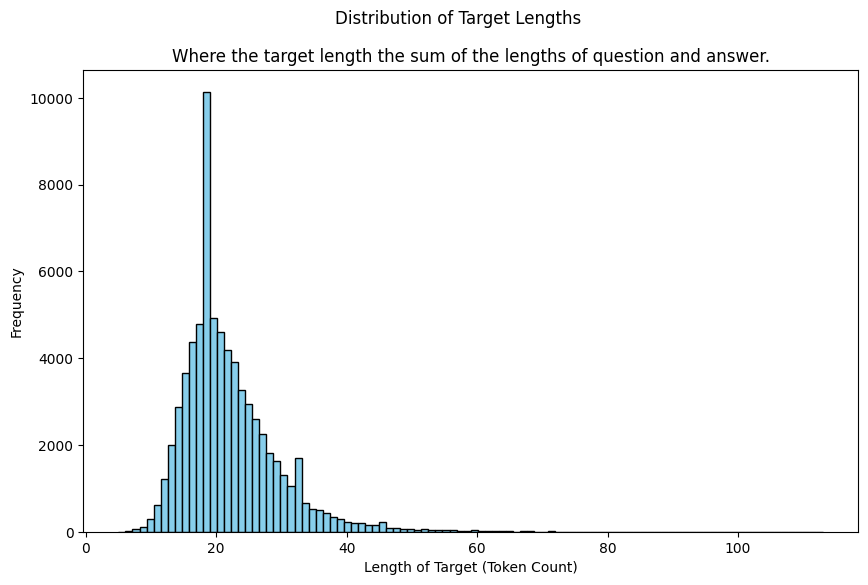

In [303]:
plt.figure(figsize=(10, 6))
plt.hist(qa2d_pd["target_length"], bins=100, color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Target Lengths")
plt.title("Where the target length the sum of the lengths of question and answer.")
plt.xlabel("Length of Target (Token Count)")
plt.ylabel("Frequency")
plt.show() # Target refers to: Question? + Answer

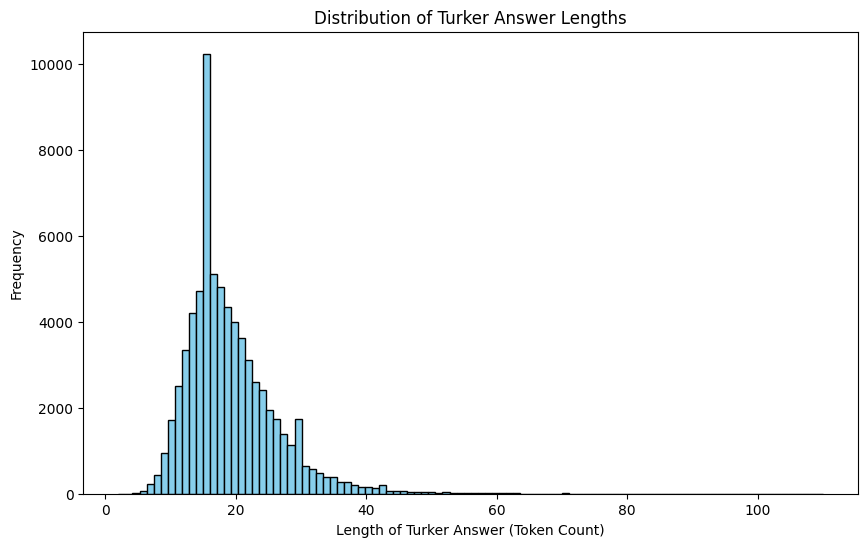

In [304]:
plt.figure(figsize=(10, 6))
plt.hist(qa2d_pd["turker_answer_length"], bins=100, color="skyblue", edgecolor="black")
plt.title("Distribution of Turker Answer Lengths")
plt.xlabel("Length of Turker Answer (Token Count)")
plt.ylabel("Frequency")
plt.show()

## Dataset Preprocessing
Now that we've finished our exploratory data analysis as well as its cleanup, let's bring back our dataset to a HuggingFace Dataset for preprocessing. We'll split the dataset into training, evaluation and test datasets. We'll then tokenize the question, answer and turker_answer features as they will serve as the main inputs and targets for our model.

In [305]:
qa2d_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71013 entries, 0 to 71053
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   dataset               71013 non-null  object
 1   example_uid           71013 non-null  object
 2   question              71013 non-null  object
 3   answer                71013 non-null  object
 4   turker_answer         71013 non-null  object
 5   rule-based            71013 non-null  object
 6   question_length       71013 non-null  int64 
 7   answer_length         71013 non-null  int64 
 8   turker_answer_length  71013 non-null  int64 
 9   target_length         71013 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 6.0+ MB


In [306]:
from datasets import Dataset
qa2d = Dataset.from_pandas(qa2d_pd)

In [307]:
qa2d

Dataset({
    features: ['dataset', 'example_uid', 'question', 'answer', 'turker_answer', 'rule-based', 'question_length', 'answer_length', 'turker_answer_length', 'target_length', '__index_level_0__'],
    num_rows: 71013
})

In [308]:
from datasets import DatasetDict

qa2d_train_test = qa2d.train_test_split(test_size=0.1)
qa2d_train_validation = qa2d_train_test["test"].train_test_split(test_size=0.5)

qa2d = DatasetDict({
    "train": qa2d_train_test["train"],
    "eval": qa2d_train_validation["train"],
    "test": qa2d_train_validation["test"]
})

In [309]:
qa2d # Make sure our dataset has been properly formatted

DatasetDict({
    train: Dataset({
        features: ['dataset', 'example_uid', 'question', 'answer', 'turker_answer', 'rule-based', 'question_length', 'answer_length', 'turker_answer_length', 'target_length', '__index_level_0__'],
        num_rows: 63911
    })
    eval: Dataset({
        features: ['dataset', 'example_uid', 'question', 'answer', 'turker_answer', 'rule-based', 'question_length', 'answer_length', 'turker_answer_length', 'target_length', '__index_level_0__'],
        num_rows: 3551
    })
    test: Dataset({
        features: ['dataset', 'example_uid', 'question', 'answer', 'turker_answer', 'rule-based', 'question_length', 'answer_length', 'turker_answer_length', 'target_length', '__index_level_0__'],
        num_rows: 3551
    })
})

In [310]:
def generate_targets(examples):
    """
    Concatenates a question to its answer in the following format
    (question)? (answer)
    """
    return list(map(
        lambda q, a: f"{q} {a}",
        examples["question"],
        examples["answer"],
    ))

# To make sure it outputs the right thing, let's test it here
statements = qa2d["train"][20:24]
for sample in zip(statements["turker_answer"], generate_targets(statements)):
    print(f"{sample[0]} => {sample[1]}")

Lord Kilmuir held the position of Lord Chancellor . => What position did Lord Kilmuir have ? Lord Chancellor
Some other attractions are Claverton Pumping Station , Dunster Working Watermill , the Fleet Air Arm Museum at Yeovilton , Nunney Castle , and The Helicopter Museum in Weston-super-Mare . => What are some other attractions Claverton Pumping Station , Dunster Working Watermill , the Fleet Air Arm Museum at Yeovilton , Nunney Castle , The Helicopter Museum in Weston-super-Mare
The KPA were defeated near Seoul , Korea . => Who was defeated near Seoul , Korea ? the KPA
She was tossing her head frequently . => How often was she tossing her head ? frequently


In [311]:
def preprocess_function(examples):
    """ 
    The objective of our model is to transform a sentence into a question.
    To do so, the input to the model will be the sentence itself.
    The output of the model is be the question followed by the answer.
    """
    prompt = "ask: " # Each input will be formatted as "ask: sentence..."
    inputs = [prompt + x for x in examples["turker_answer"]] 
    # The output is of format "question? answer"
    targets = generate_targets(examples)
    
    model_inputs = tokenizer(inputs, max_length=128, truncation=True)
    labels = tokenizer(text_target=targets, max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [312]:
tokenized_qa2d = qa2d.map(preprocess_function, batched=True) 

Map:   0%|          | 0/63911 [00:00<?, ? examples/s]

Map:   0%|          | 0/3551 [00:00<?, ? examples/s]

Map:   0%|          | 0/3551 [00:00<?, ? examples/s]

In [313]:
tokenized_qa2d

DatasetDict({
    train: Dataset({
        features: ['dataset', 'example_uid', 'question', 'answer', 'turker_answer', 'rule-based', 'question_length', 'answer_length', 'turker_answer_length', 'target_length', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 63911
    })
    eval: Dataset({
        features: ['dataset', 'example_uid', 'question', 'answer', 'turker_answer', 'rule-based', 'question_length', 'answer_length', 'turker_answer_length', 'target_length', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 3551
    })
    test: Dataset({
        features: ['dataset', 'example_uid', 'question', 'answer', 'turker_answer', 'rule-based', 'question_length', 'answer_length', 'turker_answer_length', 'target_length', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 3551
    })
})

In [314]:
print(tokenizer.decode(tokenized_qa2d["eval"][4]["labels"], skip_special_tokens=True))
print(tokenizer.decode(tokenized_qa2d["eval"][4]["input_ids"], skip_special_tokens=True))

What was Nasser's position on executing the rioter's leaders? opposed
ask: Nasser was opposed to executing the rioter's leaders.


## Training the model
To measure our model's performance, we will connect it to Tensorboard. We will employ the Rouge metric to evaluate the similarity between the desired output and the model's predictions.

In [315]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=checkpoint)

In [316]:
import evaluate
import numpy as np

rouge = evaluate.load("rouge")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [317]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [2]:
%load_ext tensorboard
%tensorboard --logdir 'output_qa2d_t5/runs' --host localhost --port 8088

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [319]:
training_args = Seq2SeqTrainingArguments(
    # Evaluation Parameters
    evaluation_strategy="steps",
    eval_steps=100,
    # Logging parameters
    logging_strategy="steps",
    logging_steps=100,
    # Save parameters  
    save_strategy="steps",
    save_steps=200,
    
    output_dir="./output_qa2d_t5",
    num_train_epochs=4,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    predict_with_generate=True,
    load_best_model_at_end=True,
    metric_for_best_model="rouge1",
    fp16=False,
    report_to="tensorboard"
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_qa2d["train"], 
    eval_dataset=tokenized_qa2d["eval"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

D:\MyProjects\DawsonAI\.env\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [320]:
trainer.train()

Step,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
100,1.774200,1.136131,0.783100,0.594900,0.662800,0.663000,16.847400
200,1.235600,0.869404,0.796100,0.592300,0.691400,0.691500,17.060800
300,0.991200,0.791000,0.799100,0.599800,0.698000,0.698100,17.058900
400,0.910200,0.746958,0.797800,0.600800,0.700000,0.700200,17.065100
500,0.908600,0.713600,0.804300,0.612600,0.708500,0.708600,17.074600
600,0.841200,0.692148,0.806600,0.618500,0.712500,0.712600,17.014400
700,0.813600,0.676602,0.810600,0.626700,0.716600,0.716800,17.071800
800,0.798400,0.662048,0.811200,0.628200,0.719200,0.719100,17.014900
900,0.789500,0.651885,0.814100,0.633900,0.723100,0.723000,17.075800
1000,0.788700,0.642549,0.814700,0.632400,0.722700,0.722600,17.059400


D:\MyProjects\DawsonAI\.env\Lib\site-packages\transformers\generation\utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
D:\MyProjects\DawsonAI\.env\Lib\site-packages\transformers\generation\utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
D:\MyProjects\DawsonAI\.env\Lib\site-packages\transformers\generation\utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
D:\MyProjects\DawsonAI\.env\Lib\site-packages\transformers\generation\utils.py:1178: UserWarning: Using the model-agnostic default `max_

TrainOutput(global_step=15980, training_loss=0.6210352476308582, metrics={'train_runtime': 27284.3608, 'train_samples_per_second': 9.37, 'train_steps_per_second': 0.586, 'total_flos': 2490224383918080.0, 'train_loss': 0.6210352476308582, 'epoch': 4.0})

In [1]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

q_model = AutoModelForSeq2SeqLM.from_pretrained("output_qa2d_t5/checkpoint-15800")
tokenizer = AutoTokenizer.from_pretrained("output_qa2d_t5/checkpoint-15800")

D:\MyProjects\DawsonAI\.env\Lib\site-packages\transformers\utils\hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [2]:
### Don't forget to add the "ask: " prompt!
input_text = "ask: Integral transmembrane proteins control the flux of nutrients between the intracellular and extracellular environments."
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

outputs = q_model.generate(input_ids, max_new_tokens=100, do_sample=False)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

What proteins control the flux of nutrients between the intracellular and extracellular environments? Integral transmembrane proteins
